# Intent to Transact: Predictive Modelling for Online Purchase Decisions

## The Dataset
[About this dataset](https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset)

> - Pages information
    - Administrative: Number of pages visited by the visitor about account management.
    - Administrative_Duration: Total amount of time (in seconds) spent by the visitor on account management related pages.
    - Informational: Number of pages visited by the visitor about Web site, communication and address information of the shopping site.
    - Informational_Duration: Total amount of time (in seconds) spent by the visitor on informational pages.
    - ProductRelated: Number of pages visited by visitor about product related pages.
    - ProductRelated_Duration: Total amount of time (in seconds) spent by the visitor on product related pages.
> - Google Analytics measurement
    - BounceRates: Average bounce rate value of the pages visited by the visitor. Specifically, visitors who enter the site from that page and then leave ('bounce') without triggering any other requests to the analytics server during that session.
    - ExitRates: Average exit rate value of the pages visited by the visitor. A specific web page is calculated as for all pageviews to the page, the average that were the last in the session.
    - PageValues: Average page value of the pages visited by the visitor.
    - SpecialDay: Closeness of the site visiting time to a special day (eg; Mother's Day or Valentine's day).
> - Time
    - Month: Month value of the visit date.
    - Weekend: Boolean value indicating whether the date of the visit is weekend.
> - Other information
    - Operating Systems: Operating system of the visitor.
    - Browser: Browser of the visitor.
    - Region: Geographic region from which the session has been started by the visitor.
    - TrafficType: Traffic source by which the visitor has arrived at the Web site (e.g., banner, SMS, direct).
    - VisitorType: Visitor type as ‘New Visitor,’ ‘Returning Visitor,’ and ‘Other'.
> - Result
    - Revenue: Class label indicating whether the visit has been finalised with a transaction.

## Business Objective
> Sales Conversion Prediction/Optimisation: The aim would be to predict the likelihood of a session ending in sales (Revenue = True). This can be beneficial for real-time decision-making, such as triggering specific promotions or notifications to nudge the user towards conversion. Target Variable: 'Revenue'

Key Aspect of the Project  
> - User Engagement Analysis
    - Analyse 'Bounce Rate' and 'Exit Rate' to understand user engagement.
> - Seasonal Trend Analysis
    - Examine how different months and special days affect user behaviour and conversions.
> - User Type Behavior
    - Compare the behaviour of new vs. returning visitors.
> - Traffic Source Efficiency
    - Investigate which types of traffic are most effective in leading to conversions.
> - Regional Marketing Strategies
    - Analyse user behaviour and conversions by region.
> - Weekend Revenue Impact
    - Evaluate the correlation between weekend visits and revenue generation.

## Machine Learning Model
> - Predictive model to identify the likelihood of an online session ending in a sale.

# Data Cleaning

In [1]:
# Import Libraries

import re

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')
df.sample(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
3615,3,101.000000,0,0.000000,7,441.000000,0.020000,0.040000,0.000000,0.0,May,2,5,4,4,Returning_Visitor,False,False
11713,5,107.666667,10,505.166667,281,14988.591510,0.008499,0.029697,0.000000,0.0,Dec,2,2,1,2,Returning_Visitor,False,False
12097,1,0.000000,0,0.000000,7,174.000000,0.000000,0.050000,0.000000,0.0,Nov,4,2,3,20,Returning_Visitor,False,False
2870,0,0.000000,0,0.000000,5,108.000000,0.000000,0.080000,0.000000,0.0,May,2,2,3,13,Returning_Visitor,False,False
8728,2,47.500000,0,0.000000,30,735.583333,0.006897,0.024138,23.510247,0.0,Dec,2,2,2,1,Returning_Visitor,False,False
11712,14,2137.112745,0,0.000000,53,4223.409838,0.008772,0.017126,8.886649,0.0,Nov,3,2,2,2,Returning_Visitor,False,False
1231,11,281.630952,0,0.000000,54,923.675735,0.000000,0.012262,5.150664,0.0,Mar,1,1,7,2,Returning_Visitor,False,False
11207,15,270.016667,3,122.000000,66,2780.600000,0.000000,0.016533,0.000000,0.0,Nov,2,2,3,10,Returning_Visitor,False,False
9356,0,0.000000,0,0.000000,4,251.000000,0.050000,0.100000,0.000000,0.0,Nov,2,2,4,3,Returning_Visitor,False,False
11293,6,283.016667,1,235.750000,21,1338.933333,0.000000,0.008696,0.000000,0.0,Dec,2,2,7,1,Returning_Visitor,False,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [4]:
for col in df.columns:
    print("{} have {} unique values: {}".format(col, df[col].nunique(), df[col].dtypes))
    if df[col].dtypes == 'int64' or df[col].dtypes == 'bool':
        print("{} values: {}".format(col,df[col].unique()))

Administrative have 27 unique values: int64
Administrative values: [ 0  1  2  4 12  3 10  6  5  9  8 16 13 11  7 18 14 17 19 15 24 22 21 20
 23 27 26]
Administrative_Duration have 3335 unique values: float64
Informational have 17 unique values: int64
Informational values: [ 0  1  2  4 16  5  3 14  6 12  7  9 10  8 11 24 13]
Informational_Duration have 1258 unique values: float64
ProductRelated have 311 unique values: int64
ProductRelated values: [  1   2  10  19   0   3  16   7   6  23  13  20   8   5  32   4  45  14
  52   9  46  15  22  11  12  36  42  27  90  18  38  17 128  25  30  21
  51  26  28  31  24  50  96  49  68  98  67  55  35  37  29  34  71  63
  87  40  33  54  64  75  39 111  81  61  47  44  88 149  41  79  66  43
 258  80  62  83 173  48  58  57  56  69  82  59 109 287  53  84  78 137
 113  89  65  60 104 129  77  74  93  76  72 194 140 110 132 115  73 328
 160  86 150  95 130 151 117 124 127 125 116 105  92 157 154 220 187 112
 131 159  94 204 142 206 102 313 145  8

In [5]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [6]:
value_counts_dict = {col: df[col].value_counts() for col in ['Revenue', 'Weekend', 'VisitorType']}

revenue = value_counts_dict['Revenue']
weekend = value_counts_dict['Weekend']
visitor_type = value_counts_dict['VisitorType']

revenue, weekend, visitor_type

(False    10422
 True      1908
 Name: Revenue, dtype: int64,
 False    9462
 True     2868
 Name: Weekend, dtype: int64,
 Returning_Visitor    10551
 New_Visitor           1694
 Other                   85
 Name: VisitorType, dtype: int64)

In [7]:
{col: df[col].nunique() for col in df.select_dtypes(include=['object']).columns}

{'Month': 10, 'VisitorType': 3}

In [8]:
df['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [9]:
df['VisitorType'].replace({'Returning_Visitor': 'Returning', 'New_Visitor': 'New'}, inplace=True)
df['VisitorType'].value_counts()

Returning    10551
New           1694
Other           85
Name: VisitorType, dtype: int64

In [10]:
categorical_columns=['Weekend','Revenue']
for col in categorical_columns:
    encoder = LabelEncoder()
    encoder.fit(df[col])
    print('Column:', col)
    print('Original categories:', encoder.classes_)
    print('Encoded values:', encoder.transform(encoder.classes_))
    print('\n')
    df[col] = encoder.fit_transform(df[col])

Column: Weekend
Original categories: [False  True]
Encoded values: [0 1]


Column: Revenue
Original categories: [False  True]
Encoded values: [0 1]




In [11]:
df.sample(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
8789,3,96.500000,0,0.0,8,323.500000,0.000000,0.020000,0.000000,0.0,Dec,1,1,6,2,Returning,0,0
11232,12,1276.264286,0,0.0,118,3215.173074,0.000000,0.005446,22.458418,0.0,Nov,3,2,8,3,Returning,0,1
11840,4,152.000000,0,0.0,2,44.500000,0.000000,0.020000,0.000000,0.0,Dec,1,1,2,2,New,0,0
2722,0,0.000000,0,0.0,29,2841.000000,0.000000,0.024138,0.000000,0.8,May,2,2,7,4,Returning,0,0
7850,4,100.600000,2,5.0,93,2002.760000,0.008163,0.026599,0.000000,0.0,Sep,2,2,3,13,Returning,0,0
3628,4,250.857143,1,37.5,71,1145.571429,0.000000,0.004054,80.587338,0.0,May,2,4,1,1,Returning,0,0
5042,3,112.000000,0,0.0,4,111.666667,0.000000,0.028571,0.000000,0.0,May,3,2,4,5,Returning,0,0
5540,1,45.400000,0,0.0,7,352.700000,0.000000,0.014286,0.000000,0.0,Oct,1,1,3,4,Returning,0,0
5516,0,0.000000,0,0.0,11,267.566667,0.000000,0.009091,7.687451,0.0,Oct,2,2,1,3,New,0,1
5451,4,85.928571,0,0.0,39,681.761905,0.015385,0.032988,0.000000,0.0,May,1,1,7,3,Returning,0,0


# Exploratory Data Analysis (EDA)

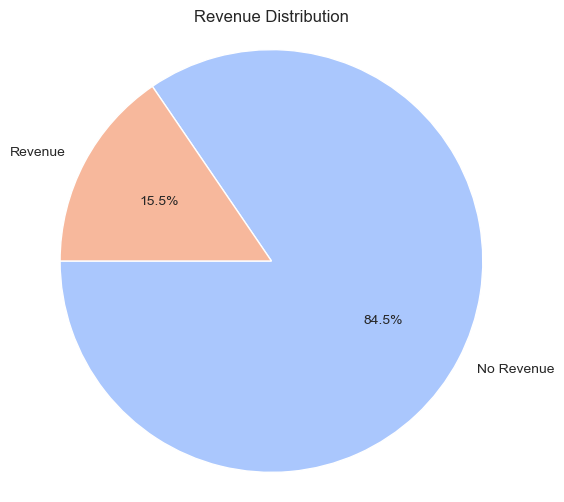

In [12]:
revenue_counts = df['Revenue'].value_counts()

sns.set_style('whitegrid')
colors = sns.color_palette('coolwarm', len(revenue_counts))

plt.figure(figsize=(6, 6))
plt.pie(revenue_counts, labels=['No Revenue', 'Revenue'], autopct='%1.1f%%', startangle=180, colors=colors)
plt.title('Revenue Distribution')
plt.axis('equal') 

plt.savefig('revenue_distribution.jpg', dpi=300, bbox_inches='tight')
plt.show()

# Reset any previous Seaborn styles
sns.reset_orig()

## User Engagement Analysis
> - Analyse bounce rate, exit rate, and page values to understand user engagement.

In [13]:
# Correlation matrix to find the relationship between PageValues, BounceRates, and ExitRates
correlation_matrix = df[['PageValues', 'BounceRates', 'ExitRates']].corr()

# Conversion rate for the revenue generated - it is the number of conversions divided by the total number of visitors
conversion_rate = df['Revenue'].mean() * 100  # multiplied by 100 to get a percentage

correlation_matrix, conversion_rate

(             PageValues  BounceRates  ExitRates
 PageValues     1.000000    -0.119386  -0.174498
 BounceRates   -0.119386     1.000000   0.913004
 ExitRates     -0.174498     0.913004   1.000000,
 15.474452554744525)

In [14]:
# Coefficient of determination (R^2) for BounceRates and ExitRates
r2 = correlation_matrix.loc['BounceRates', 'ExitRates'] ** 2
r2_percentage = r2 * 100  # Convert to percentage
r2, r2_percentage

(0.8335770274467792, 83.35770274467792)

In [15]:
# Temporary mapping for the 'Revenue' hue
revenue_temp_map = df['Revenue'].map({0: 'No', 1: 'Yes'})

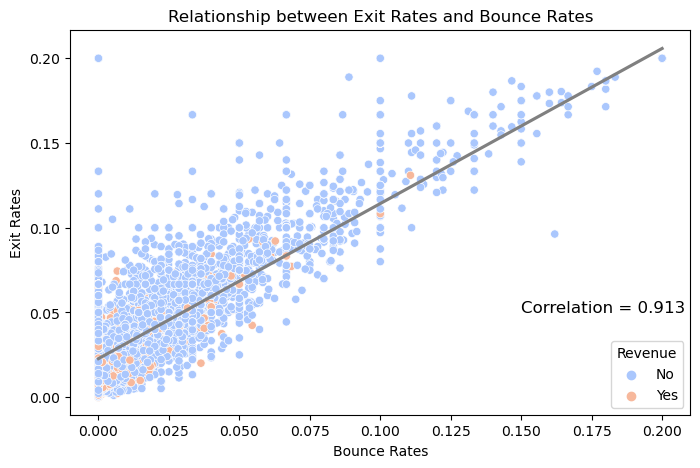

In [16]:
# Realtionship between ExitRate and BounceRate

plt.figure(figsize=(8, 5))

# Temporary mapping for the plot without changing the dataframe as we've encoded Revenue to binary
sns.scatterplot(data=df, x='BounceRates', y='ExitRates', hue=revenue_temp_map, palette='coolwarm')

sns.regplot(data=df, x='BounceRates', y='ExitRates', scatter=False, color='grey')

plt.title('Relationship between Exit Rates and Bounce Rates')
plt.xlabel('Bounce Rates')
plt.ylabel('Exit Rates')

# Indicate correlation
correlation_value = df['BounceRates'].corr(df['ExitRates'])
plt.text(0.15, 0.05, f'Correlation = {correlation_value:.3f}', fontsize=12)

plt.legend(title='Revenue')
# Save the plot as a JPG file
plt.savefig('exitrates_vs_bouncerates.jpg', dpi=300, bbox_inches='tight')
plt.show()

### Relationship between Exit Rates and Bounce Rates Analysis
> - There is a strong positive correlation of approximately 0.913 between Bounce Rates and Exit Rates. This suggests that pages with high bounce rates are also likely to have high exit rates.
> - Given this strong correlation, strategies aimed at reducing the bounce rate are likely to have a positive impact on reducing the exit rate as well.

> Actionable Recommendations:
    > - Investigate common factors that contribute to both high bounce rates and exit rates, such as page load speed, content quality, or navigation issues.
    > - Implement A/B tests to validate the effectiveness of changes aimed at reducing these rates, and thereby potentially increasing revenue.
    > - The high correlation between Bounce Rates and Exit Rates signifies that interventions in one area could result in improvements in the other, making it a key focal point for user experience optimisation.

In [17]:
# Inspecting the 'PageValues' column in the dataset
df['PageValues'].describe()

count    12330.000000
mean         5.889258
std         18.568437
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        361.763742
Name: PageValues, dtype: float64

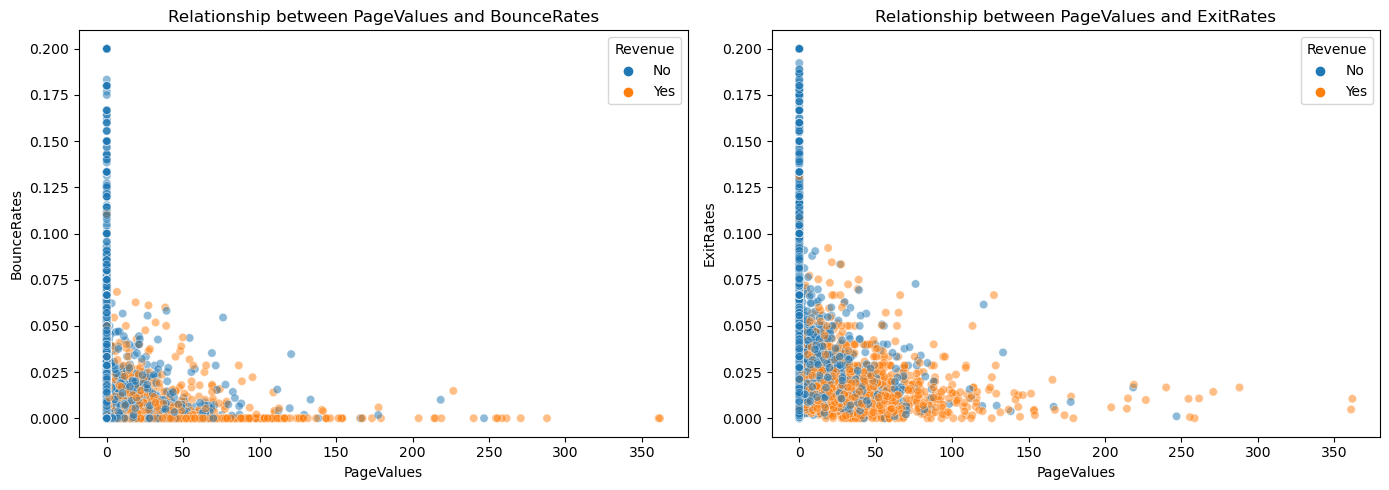

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Relationship between PageValues and BounceRates
sns.scatterplot(data=df, x='PageValues', y='BounceRates', ax=axs[0], alpha=0.5, hue=revenue_temp_map)
axs[0].set_title('Relationship between PageValues and BounceRates')
axs[0].set_xlabel('PageValues')
axs[0].set_ylabel('BounceRates')
axs[0].legend(title='Revenue')

# Relationship between PageValues and ExitRates
sns.scatterplot(data=df, x='PageValues', y='ExitRates', ax=axs[1], alpha=0.5, hue=revenue_temp_map)
axs[1].set_title('Relationship between PageValues and ExitRates')
axs[1].set_xlabel('PageValues')
axs[1].set_ylabel('ExitRates')
axs[1].legend(title='Revenue')

plt.tight_layout()
plt.savefig('pagevalues_vs_exitrates_bouncerates.jpg', dpi=300, bbox_inches='tight')
plt.show()

### Relationship between Bounce Rates, Exit Rates, and Revenue Analysis
> **PageValues and BounceRates**
    > - Sessions with higher page values tend to have lower bounce rates, which is intuitive as engaging content likely retains visitors on the page, leading to higher page values.
    > - Sessions that resulted in revenue (Revenue = 1) generally have higher page values and lower bounce rates compared to sessions that did not result in revenue.

> **PageValues and ExitRates**
    > - Similar to bounce rates, higher page values are associated with lower exit rates. This suggests that pages which contribute more to the final transaction are more effective at keeping users engaged.
    > - Revenue-generating sessions are clustered at lower exit rates and higher page values, further suggesting that these pages play a crucial role in conversion.

> These findings indicates that improving the quality and engagement of pages, as measured by page values, can potentially reduce bounce and exit rates, thus increasing the likelihood of revenue generation. 

## Seasonality Trend Analysis
>  Examine how different months, weekend, and special days affect user behaviour and conversions.

#### Month Revenue Impact

In [19]:
# Calculating the conversion rate for each month

total_sessions_by_month = df['Month'].value_counts()

# Count the number of sessions that resulted in revenue for each month
revenue_sessions_by_month = df[df['Revenue'] == 1]['Month'].value_counts()

# Calculate the conversion rate
conversion_rate_by_month = (revenue_sessions_by_month / total_sessions_by_month) * 100

# Creating a DataFrame to hold the results
conversion_rate_by_month_df = pd.DataFrame({
    'Total_Sessions': total_sessions_by_month,
    'Revenue_Sessions': revenue_sessions_by_month,
    'Conversion_Rate (%)': conversion_rate_by_month
}).reset_index().rename(columns={'index': 'Month'})

conversion_rate_by_month_df

,Month,Total_Sessions,Revenue_Sessions,Conversion_Rate (%)
0,Aug,433,76,17.551963
1,Dec,1727,216,12.507238
2,Feb,184,3,1.630435
3,Jul,432,66,15.277778
4,June,288,29,10.069444
5,Mar,1907,192,10.068170
6,May,3364,365,10.850178
7,Nov,2998,760,25.350233
8,Oct,549,115,20.947177
9,Sep,448,86,19.196429


In [20]:
# Visitor type distribution across months
visitor_type_distribution = df.groupby(['Month', 'VisitorType']).size().unstack(fill_value=0)

monthly_totals = visitor_type_distribution.sum(axis=1)

# Percentage of each visitor type for each month
visitor_type_percentage = visitor_type_distribution.divide(monthly_totals, axis=0) * 100

monthly_totals, visitor_type_percentage

(Month
 Aug      433
 Dec     1727
 Feb      184
 Jul      432
 June     288
 Mar     1907
 May     3364
 Nov     2998
 Oct      549
 Sep      448
 dtype: int64,
 VisitorType        New     Other  Returning
 Month                                      
 Aug          16.628176  0.000000  83.371824
 Dec          19.397800  3.590041  77.012160
 Feb           0.543478  0.000000  99.456522
 Jul          12.500000  0.000000  87.500000
 June         10.416667  0.347222  89.236111
 Mar          12.165705  0.000000  87.834295
 May           9.482759  0.000000  90.517241
 Nov          13.975984  0.733823  85.290193
 Oct          22.586521  0.000000  77.413479
 Sep          24.107143  0.000000  75.892857)

In [21]:
# Distribution (actual counts) of visitor types for all months
visitor_type_counts = visitor_type_distribution.copy()

all_months_visitor_counts = visitor_type_counts
all_months_visitor_counts

VisitorType,New,Other,Returning
Month,,,
Aug,72,0,361
Dec,335,62,1330
Feb,1,0,183
Jul,54,0,378
June,30,1,257
Mar,232,0,1675
May,319,0,3045
Nov,419,22,2557
Oct,124,0,425


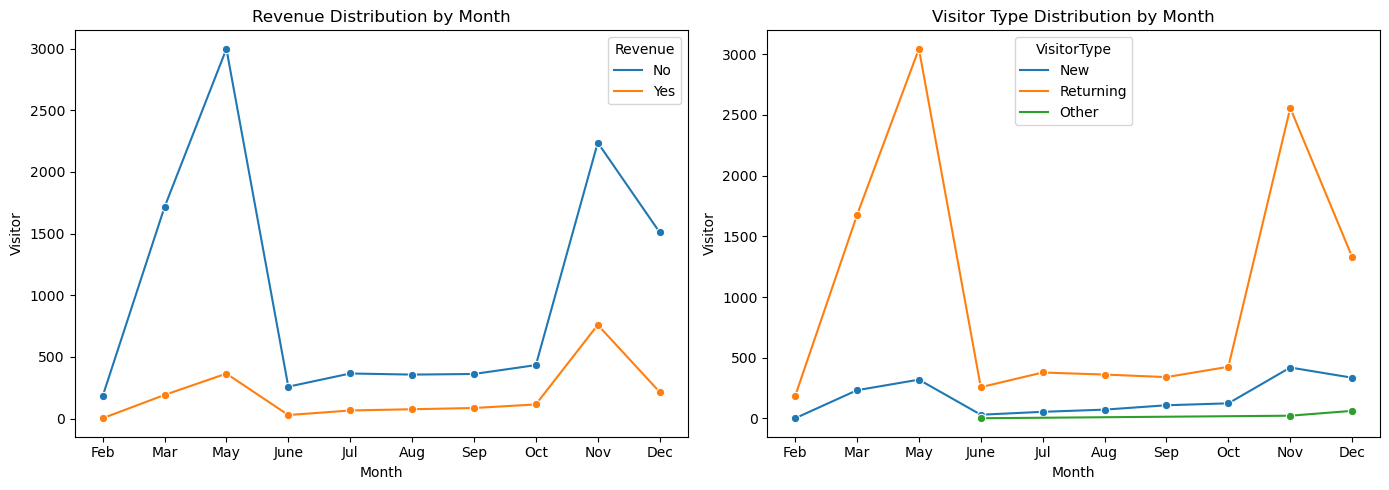

In [25]:
# Order the months
months_order = ['Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

trend_revenue_months = df.groupby(['Month', 'Revenue']).size().reset_index(name='Frequency')
trend_visitor_months = df.groupby(['Month', 'VisitorType']).size().reset_index(name='Frequency')

# Temporary mapping for the 'Revenue' column
trend_revenue_months['Revenue'] = trend_revenue_months['Revenue'].map({0: 'No', 1: 'Yes'})

# Months to the order specified for plotting
trend_revenue_months['Month'] = pd.Categorical(trend_revenue_months['Month'], categories=months_order, ordered=True)
trend_visitor_months['Month'] = pd.Categorical(trend_visitor_months['Month'], categories=months_order, ordered=True)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Revenue status based on months
sns.lineplot(data=trend_revenue_months, x='Month', y='Frequency', hue='Revenue', ax=axes[0], marker='o')
axes[0].set_title('Revenue Distribution by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Visitor')
axes[0].set_xticks(range(len(months_order)))
axes[0].set_xticklabels(months_order)

# Visitor type based on months
sns.lineplot(data=trend_visitor_months, x='Month', y='Frequency', hue='VisitorType', ax=axes[1], marker='o')
axes[1].set_title('Visitor Type Distribution by Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Visitor')
axes[1].set_xticks(range(len(months_order)))
axes[1].set_xticklabels(months_order)

plt.tight_layout()
plt.savefig('revenue_visitor_trends.jpg', dpi=400, bbox_inches='tight')
plt.show()

### Revenue and Visitor Trend by Month Analysis
> - Revenue Trend by Month: A noticeable pattern is evident where visitor engagement and revenue generation seem to peak during the months of 'May', 'Nov', and 'Dec'. Interestingly, the months of 'May' and 'Nov' exhibit higher visitor counts but relatively lower conversion rates, indicating that while engagement is high, conversions are not.
> - Visitor Type Trend by Month: The trend line for visitor types shows that returning visitors consistently contribute to a significant proportion of the total monthly visits. This is particularly evident during high-engagement months like 'May', 'Nov', and 'Dec'.

> These trends suggest that while visitor engagement is generally high during specific months, the conversion rate does not proportionally follow, especially for returning visitors. This could imply that while existing retention strategies may be effective in bringing visitors back to the website, they are not as effective in converting these visits to sales. Therefore, revisiting these strategies could be beneficial.

#### Weekend Revenue Impact

In [26]:
# Calculating the conversion rate for Weekend
total_sessions_by_weekend = df['Weekend'].value_counts()
revenue_sessions_by_weekend = df[df['Revenue'] == 1]['Weekend'].value_counts()
conversion_rate_by_weekend = (revenue_sessions_by_weekend / total_sessions_by_weekend) * 100

conversion_rate_by_weekend_df = pd.DataFrame({
    'Total_Sessions': total_sessions_by_weekend,
    'Revenue_Sessions': revenue_sessions_by_weekend,
    'Conversion_Rate (%)': conversion_rate_by_weekend
}).reset_index().rename(columns={'index': 'Weekend_Status'})

conversion_rate_by_weekend_df

,Weekend_Status,Total_Sessions,Revenue_Sessions,Conversion_Rate (%)
0,0,9462,1409,14.891144
1,1,2868,499,17.398884


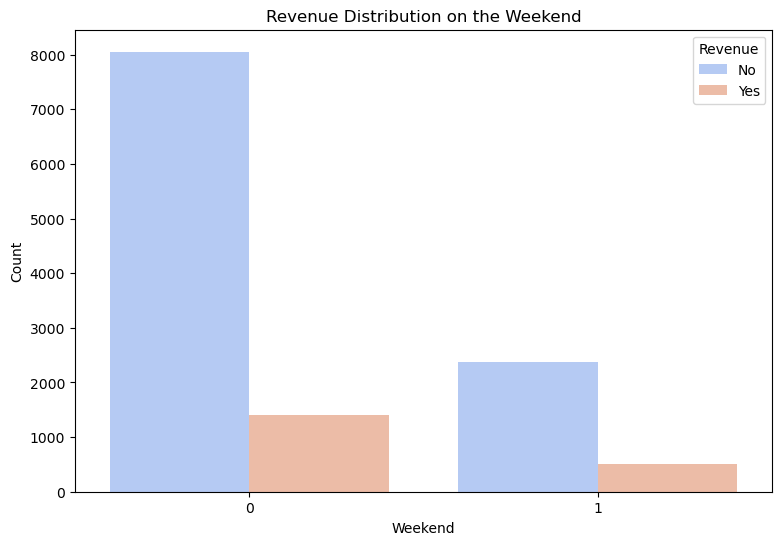

In [27]:
# Visualising the distribution of Revenue based on whether the session occurred on a weekend or not
plt.figure(figsize=(9, 6))
palette = sns.color_palette('coolwarm', 2)

sns.countplot(data=df, x='Weekend', hue='Revenue', palette=palette)

plt.title('Revenue Distribution on the Weekend')
plt.xlabel('Weekend')
plt.ylabel('Count')
plt.legend(title='Revenue', labels=['No', 'Yes'])

plt.savefig('revenue_weekend.jpg', dpi=300, bbox_inches='tight')
plt.show()

### Revenue Distribution on the Weekend Analysis
> - The majority of sessions, both during the weekend and on weekdays, do not result in a purchase (Revenue = No).
> - The distribution of sessions that resulted in revenue (Revenue = Yes) is approximately 3% higher in the weekend compared to weekdays. However, there isn't a stark difference suggesting that weekends are significantly better for revenue generation.

#### Special Day Revenue Impact

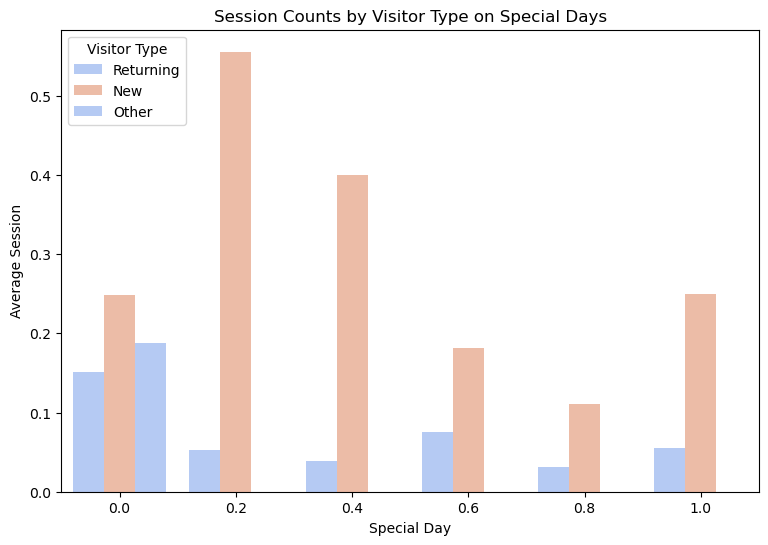

SpecialDay
0.0    0.165268
0.6    0.082621
0.2    0.078652
Name: Revenue, dtype: float64

In [28]:
# Relationship between SpecialDay, VisitorType, and Revenue distribution (both 0 and 1)

# Grouping the data by 'SpecialDay' and calculating the mean Revenue 
special_day_analysis = df.groupby('SpecialDay')['Revenue'].mean()
special_day_analysis = special_day_analysis.sort_values(ascending=False)

plt.figure(figsize=(9, 6))
palette = sns.color_palette('coolwarm', 2)

sns.barplot(data=df, x='SpecialDay', y='Revenue', hue='VisitorType', palette=palette, estimator=np.mean, ci=None)

plt.title('Session Counts by Visitor Type on Special Days')
plt.xlabel('Special Day')
plt.ylabel('Average Session')

plt.legend(title='Visitor Type', labels=['Returning', 'New', 'Other'])
plt.savefig('session_visitortype_specialdays.jpg', dpi=300, bbox_inches='tight')
plt.show()

# Identifying the special days with the highest impact on Revenue distribution
top_special_days = special_day_analysis.head(3)
top_special_days

### Special Day Impact on Revenue Distribution Analysis
> The average revenue includes both converted (Revenue=1) and non-converted sessions (Revenue=0), which means it is not a pure measure of conversion rate but rather a composite metric of user behaviour and conversion tendencies.
> - Special Days: Days not near any special day (0.0) have the highest average revenue for both visitor types.
> - Visitor Type: New visitors generally have higher average revenue across most special days.
> - Special Days & Visitor Type: New visitors notably outperform returning ones on days moderately close to a special day (0.2, 0.4, 0.6). Given that this average revenue incorporates both conversions and non-conversions, this suggests that new visitors may be more inclined to engage in revenue-generating activities around these specific special days.

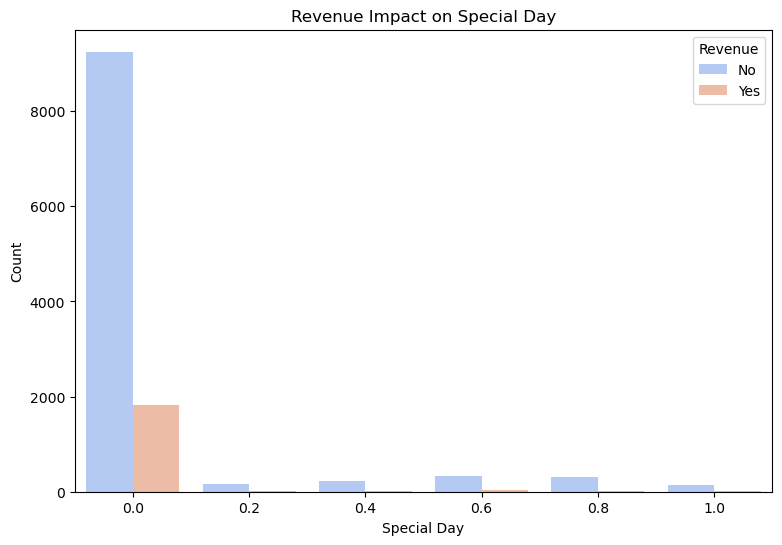

In [29]:
plt.figure(figsize=(9, 6))
palette = sns.color_palette('coolwarm', 2)

# Plotting the distribution of 'Revenue' across different 'SpecialDay' values
sns.countplot(data=df, x='SpecialDay', hue='Revenue', palette=palette)

plt.title('Revenue Impact on Special Day')
plt.xlabel('Special Day')
plt.ylabel('Count')

plt.legend(title='Revenue', labels=['No', 'Yes'])
plt.savefig('revenue_specialday.jpg', dpi=300, bbox_inches='tight')
plt.show()

### Analysis
> The overall average revenue tends to decrease as the 'SpecialDay' value approaches 1. This is consistent for both new and returning visitors. The average revenue is highest when there is no special day ('SpecialDay' value of 0). The declining average revenue as we approach special days suggests that users might be browsing more and buying less during these periods.

## Traffic Source Analysis
> - Investigate which types of traffic are most effective in leading to conversions.
> - Types of traffic: Direct, Organic, Referral, Social, Email, Display, Paid.

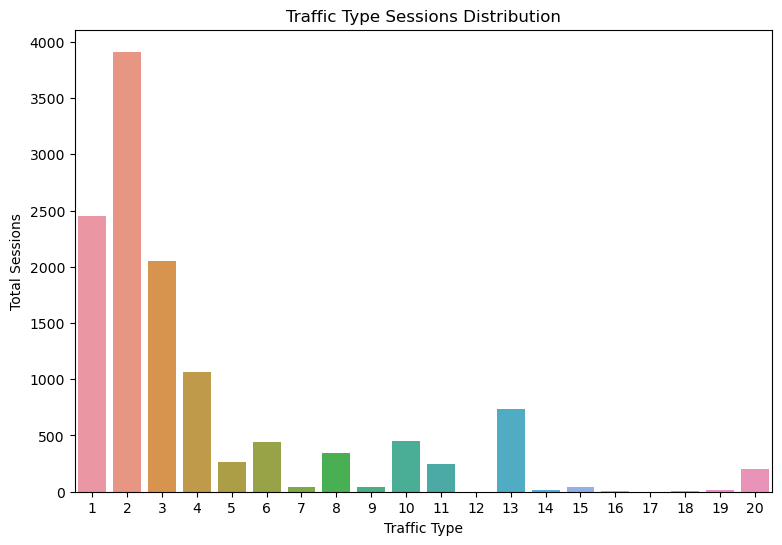

In [30]:
# The is to analyse 'Total Sessions' for each Traffic Type, not 'Total Revenue = 1'
# Specifically, this counts the total number of sessions (both revenue-generating and non-revenue-generating) associated with each Traffic Type.

# Creating a DF to hold the count of Revenue by Traffic Type
total_revenue = df.groupby('TrafficType')['Revenue'].count()
total_revenue_df = pd.DataFrame({'Traffic_Type': total_revenue.index, 'Total_Sessions': total_revenue.values})

# DF by 'Total_Revenue' in descending order
total_revenue_df_sorted = total_revenue_df.sort_values(ascending=False, by='Total_Sessions')

plt.figure(figsize=(9, 6))
sns.barplot(data=total_revenue_df_sorted, x='Traffic_Type', y='Total_Sessions')

plt.title('Traffic Type Sessions Distribution')
plt.xlabel('Traffic Type')
plt.ylabel('Total Sessions')

plt.savefig('traffictypes_distribution.jpg', dpi=300, bbox_inches='tight')
plt.show()

#total_revenue_df_sorted

In [31]:
# Calculating the conversion rate for each traffic type

total_sessions_by_traffic_type = df['TrafficType'].value_counts()

# Counting the number of sessions that resulted in revenue for each traffic type
revenue_sessions_by_traffic_type = df[df['Revenue'] == 1]['TrafficType'].value_counts()

# Calculating the conversion rate
conversion_rate_by_traffic_type = (revenue_sessions_by_traffic_type / total_sessions_by_traffic_type) * 100

conversion_rate_by_traffic_type_df = pd.DataFrame({
    'Total_Sessions': total_sessions_by_traffic_type,
    'Revenue_Sessions': revenue_sessions_by_traffic_type,
    'Conversion_Rate (%)': conversion_rate_by_traffic_type
}).reset_index().rename(columns={'index': 'Traffic_Type'})

# Filling NaN values with zeros
conversion_rate_by_traffic_type_df['Revenue_Sessions'].fillna(0, inplace=True)
conversion_rate_by_traffic_type_df['Conversion_Rate (%)'].fillna(0, inplace=True)

conversion_rate_by_traffic_type_df

,Traffic_Type,Total_Sessions,Revenue_Sessions,Conversion_Rate (%)
0,1,2451,262.0,10.689514
1,2,3913,847.0,21.645796
2,3,2052,180.0,8.771930
3,4,1069,165.0,15.434986
4,5,260,56.0,21.538462
5,6,444,53.0,11.936937
6,7,40,12.0,30.000000
7,8,343,95.0,27.696793
8,9,42,4.0,9.523810
9,10,450,90.0,20.000000


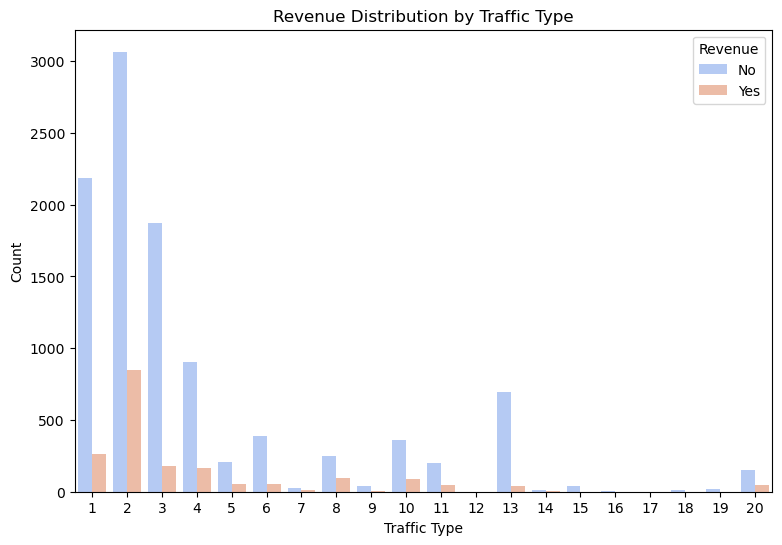

In [32]:
# Analysing how different Traffic Types impact the Revenue

plt.figure(figsize=(9, 6))
palette = sns.color_palette('coolwarm', 2)

# Plotting the distribution of 'Revenue' across different 'TrafficType'
sns.countplot(data=df, x='TrafficType', hue='Revenue', palette=palette)

plt.title('Revenue Distribution by Traffic Type')
plt.xlabel('Traffic Type')
plt.ylabel('Count')

plt.legend(title='Revenue', labels=['No', 'Yes'])

# Adding grid lines for easier interpretation of the bars
#plt.grid(axis='y')
plt.savefig('revenue_traffictype.jpg', dpi=300, bbox_inches='tight')
plt.show()

### Revenue by Traffic Type Analysis
> - **High Conversion Types:** Traffic Types 2 and 3 have the highest number of conversions, indicating they are effective channels for driving revenue.
> - **Low Conversion Types:** Conversely, Traffic Types like 8, 5, and 13 have very few conversions, suggesting that they may be less effective for driving revenue.
> - **Volume-Conversion Mismatch:** Some Traffic Types, such as 1 and 4, have a high volume of traffic but relatively fewer conversions. This could be an area to investigate for optimisation.
    
> This analysis could be beneficial for directing marketing spend and effort. Knowing which Traffic Types are more likely to result in conversions can help in resource allocation.

## User Type Behaviour Analysis
> - Compare the behaviour of new vs. returning visitors.

In [33]:
# Calculating the conversion rate for each user type

# Counting the total number of sessions for each user type
total_sessions_by_user_type = df['VisitorType'].value_counts()

# Counting the number of sessions that resulted in revenue for each user type
revenue_sessions_by_user_type = df[df['Revenue'] == 1]['VisitorType'].value_counts()

# Conversion rate
conversion_rate_by_user_type = (revenue_sessions_by_user_type / total_sessions_by_user_type) * 100

conversion_rate_df = pd.DataFrame({
    'Total_Sessions': total_sessions_by_user_type,
    'Revenue_Sessions': revenue_sessions_by_user_type,
    'Conversion_Rate (%)': conversion_rate_by_user_type
}).reset_index().rename(columns={'index': 'User_Type'})

conversion_rate_df

,User_Type,Total_Sessions,Revenue_Sessions,Conversion_Rate (%)
0,Returning,10551,1470,13.932329
1,New,1694,422,24.911452
2,Other,85,16,18.823529


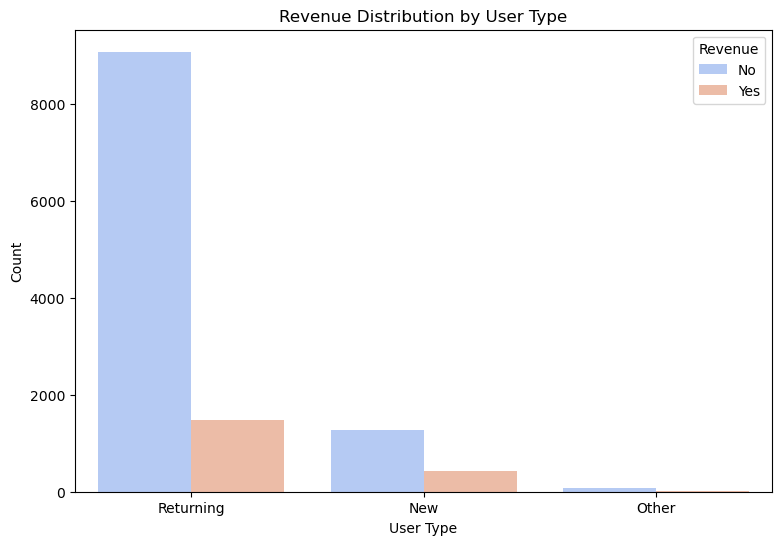

In [34]:
# Analysing User Type Behaviour - how different types of users (New, Returning, Other) impact the Revenue

plt.figure(figsize=(9, 6))
palette = sns.color_palette('coolwarm', 2)

# Distribution of 'Revenue' across different 'VisitorType'
sns.countplot(data=df, x='VisitorType', hue='Revenue', palette=palette)

plt.title('Revenue Distribution by User Type')
plt.xlabel('User Type')
plt.ylabel('Count')

plt.legend(title='Revenue', labels=['No', 'Yes'])
plt.savefig('revenue_usertype.jpg', dpi=300, bbox_inches='tight')
plt.show()

### Revenue by User Type Analysis
> - **High Conversion for New Visitors:** Even though the number of new visitors is comparatively low, a relatively higher proportion of these sessions convert into revenue. This could imply that new visitors are more likely to make a purchase and could be a target for specific marketing campaigns.
> - **Loyalty Doesn't Always Convert:** Although returning visitors make up the majority of the website traffic, their conversion rate is lower compared to new visitors. This indicates that frequent visits from this user group do not necessarily translate into consistent revenue. Given the sheer volume of returning visitors, a slight improvement in conversion rates could significantly boost revenue. Therefore, retention strategies or loyalty programs may need to be revisited to enhance user experience and, in turn, conversion rates.
> - **Others – Minimal Impact:** The 'Other' category is negligible in both volume and conversion, so it may not require immediate marketing focus unless we dive deeper into who this segment constitutes.

## Conversions by region Analysis

In [35]:
# Calculating the conversion rate for each region

total_sessions_by_region = df['Region'].value_counts()

# Number of sessions that resulted in revenue for each region
revenue_sessions_by_region = df[df['Revenue'] == 1]['Region'].value_counts()

# Conversion rate
conversion_rate_by_region = (revenue_sessions_by_region / total_sessions_by_region) * 100

conversion_rate_by_region_df = pd.DataFrame({
    'Total_Sessions': total_sessions_by_region,
    'Revenue_Sessions': revenue_sessions_by_region,
    'Conversion_Rate (%)': conversion_rate_by_region
}).reset_index().rename(columns={'index': 'Region'})

conversion_rate_by_region_df = conversion_rate_by_region_df.sort_values(by='Conversion_Rate (%)', ascending=False)
conversion_rate_by_region_df

,Region,Total_Sessions,Revenue_Sessions,Conversion_Rate (%)
8,9,511,86,16.829746
1,2,1136,188,16.549296
4,5,318,52,16.352201
0,1,4780,771,16.129707
6,7,761,119,15.637319
3,4,1182,175,14.805415
2,3,2403,349,14.523512
5,6,805,112,13.913043
7,8,434,56,12.903226


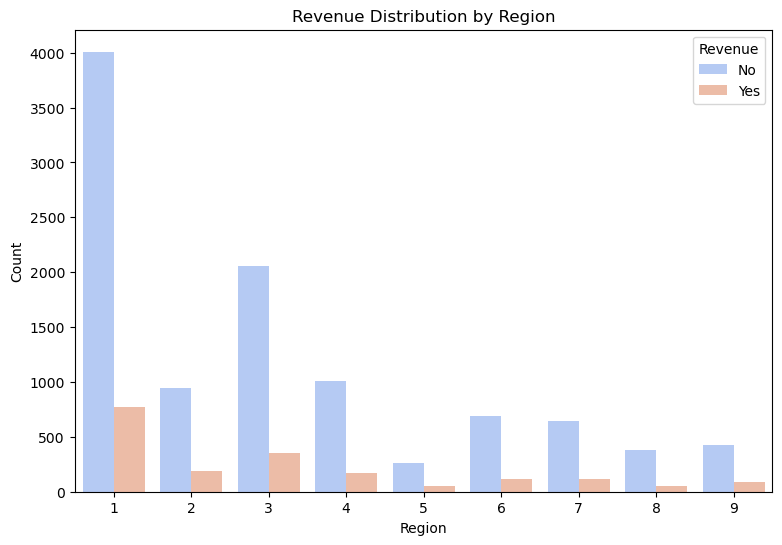

In [36]:
plt.figure(figsize=(9, 6))
palette = sns.color_palette('coolwarm', 2)

# Distribution of 'Revenue' across different 'Regions'
sns.countplot(data=df, x='Region', hue='Revenue', palette=palette)

plt.title('Revenue Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')

plt.legend(title='Revenue', labels=['No', 'Yes'])
plt.savefig('revenue_region.jpg', dpi=300, bbox_inches='tight')
plt.show()

### Revenue Conversions by Region Analysis
> - **Region 9 Leads in Conversion:** With a conversion rate of approximately 16.83%, Region 9 has the highest rate among all regions. Although the total sessions (511) are fewer compared to other regions, a significant portion (86) resulted in revenue.
> - **Region 2 and 5 Follow Closely:** Both regions have conversion rates around 16.5% and 16.35%, respectively, making them strong contributors to revenue as well.
> - **Region 1 - High Traffic, Good Conversion:** This region has the highest total sessions (4780), and its conversion rate stands at approximately 16.13%. This suggests that it is a critical area for the business.
> - **Region 8 Lags Behind:** With the lowest conversion rate of approximately 12.90%, Region 8 might require specific marketing strategies to improve its performance.
> - **General Trend:** Higher conversion rates are not solely dependent on higher traffic. Some regions with lower traffic have shown impressive conversion rates, suggesting the quality of the session is more impactful than the quantity.

## Revenue and Various Features Analysis
> - Analyse correlation between revenue and features: operating systems, browser, administrative, 'administrative duration, informational, informational duration, product related, product related duration.

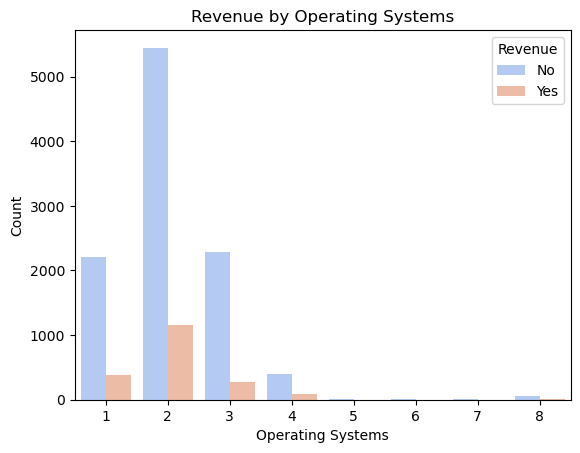

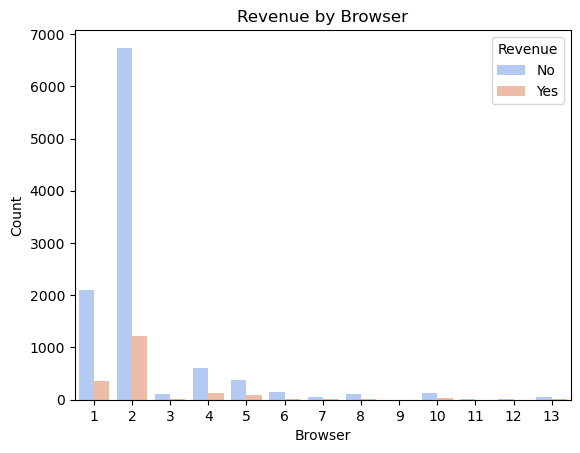

In [37]:
palette = sns.color_palette('coolwarm', 2)

# Analysis by Operating Systems
#plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='OperatingSystems', hue='Revenue', palette=palette)
plt.title('Revenue by Operating Systems')
plt.xlabel('Operating Systems')
plt.ylabel('Count')
plt.legend(title='Revenue', labels=['No', 'Yes'])
plt.savefig('revenue_os.jpg', dpi=300, bbox_inches='tight')
plt.show()

# Analysis by Browser
#plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='Browser', hue='Revenue', palette=palette)
plt.title('Revenue by Browser')
plt.xlabel('Browser')
plt.ylabel('Count')
plt.legend(title='Revenue', labels=['No', 'Yes'])
plt.savefig('revenue_browser.jpg', dpi=300, bbox_inches='tight')
plt.show()

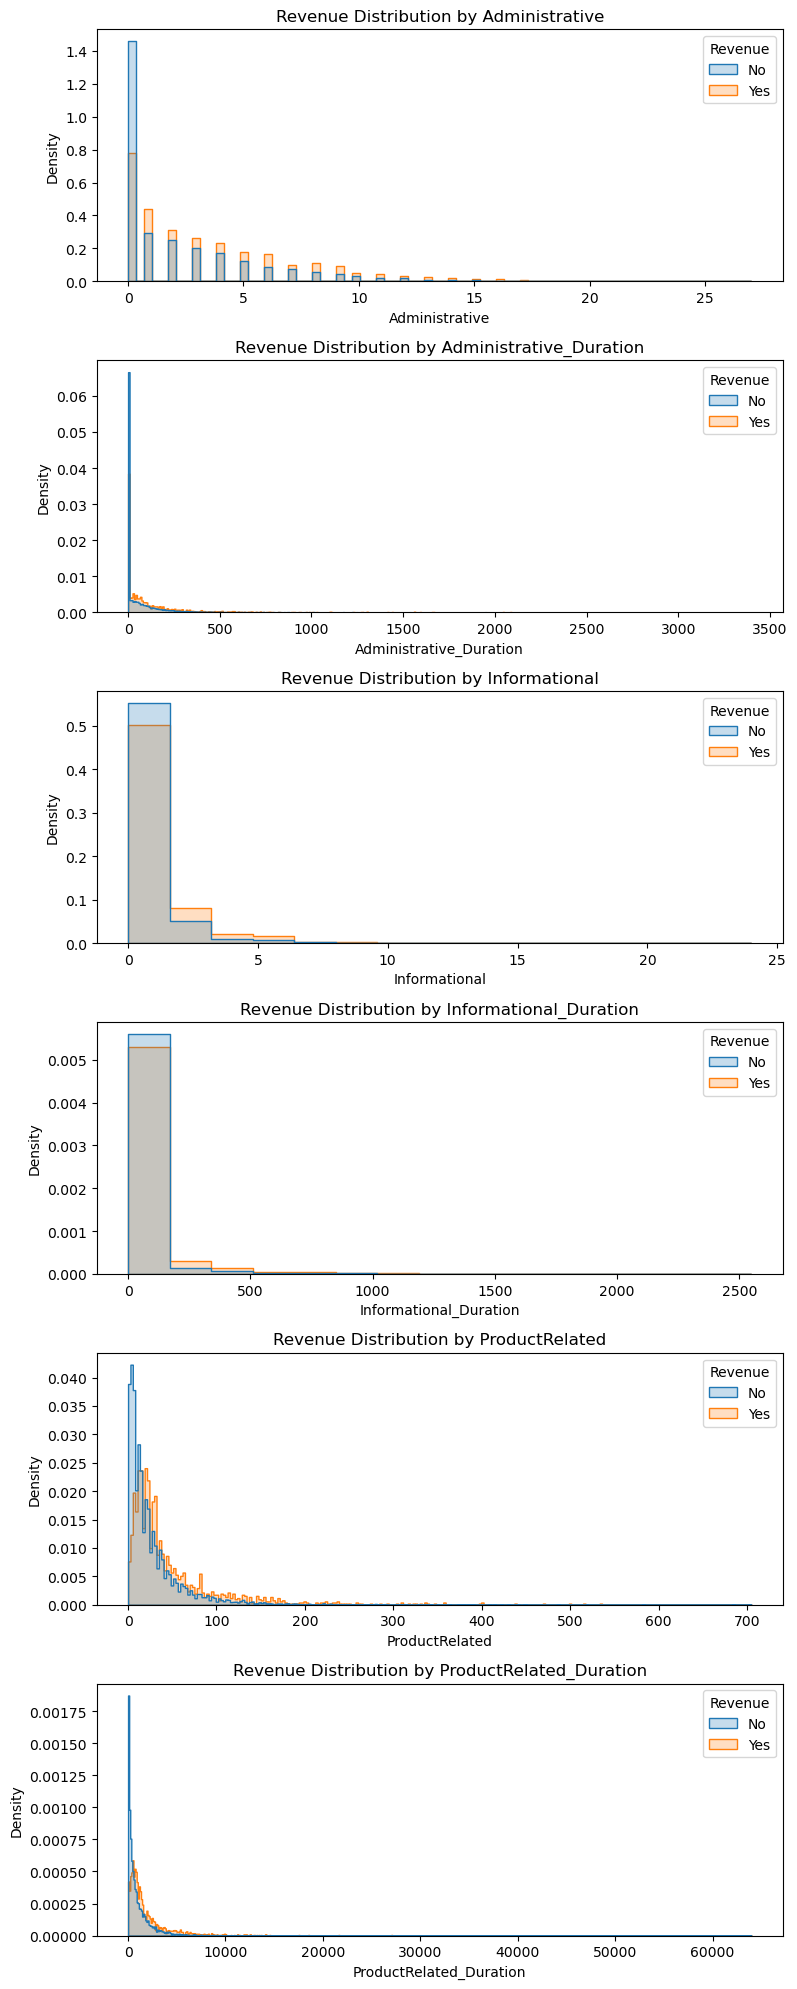

In [38]:
# Relationship between Revenue and selected features

df['Revenue'] = df['Revenue'].replace({1: 'Yes', 0: 'No'})

features = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 
            'ProductRelated', 'ProductRelated_Duration']

fig, axs = plt.subplots(len(features), figsize=(8, 20))

for i, feature in enumerate(features):
    sns.histplot(df, x=feature, hue='Revenue', element='step', stat='density', common_norm=False, ax=axs[i])
    axs[i].set_title(f'Revenue Distribution by {feature}')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Density')

plt.tight_layout()
plt.savefig('revenue_features.jpg', dpi=300, bbox_inches='tight')
plt.show()

### Relationship between Revenue and Various Features (Pages Information) Analysis
> - Administrative: The distribution for both Revenue=No and Revenue=Yes appears to be right-skewed. Most visitors with or without revenue generation have low administrative page interactions.
> - Administrative Duration: Similar to 'Administrative', the duration spent on administrative pages is also right-skewed for both revenue classes. Most of the visitors spend a minimal amount of time.
> - Informational: The majority of the visitors either don't visit or spend very little time on informational pages, regardless of whether they generate revenue (Yes or No).
> - Informational Duration: Similar to 'Informational', the time spent on informational pages is generally low for both Revenue=No and Revenue=Yes, indicating it may not be a strong factor in revenue generation.
> - Product Related: This feature shows a right-skewed distribution but with a more extended tail for Revenue=Yes, indicating that higher interaction with product-related pages could be a positive indicator for revenue generation.
> - Product Related Duration: This feature also suggests that visitors who generate revenue (Yes) tend to spend more time on product-related pages compared to those who don't (No).

### Observation
> - The 'Administrative', 'Informational', and 'ProductRelated' columns represent the number of pages visited by the user in each of these categories, and the total number of pages visited is already captured by the 'PageValues' column. This could be potential redundancy. 
> - Redundant or highly correlated features can often introduce multicollinearity in regression models, making it difficult to interpret the importance of individual predictors. They can also lead to overfitting in some machine learning models.

### Approach
> - Correlation Analysis: Calculate the correlation matrix to check if 'Administrative', 'Informational', and 'ProductRelated' columns are highly correlated with 'PageValues'. If they are, will consider removing or combining some of the features.

In [39]:
selected_columns = ['PageValues', 'Administrative', 'Administrative_Duration', 
                    'Informational', 'Informational_Duration', 
                    'ProductRelated', 'ProductRelated_Duration']

selected_df = df[selected_columns]
selected_corr = selected_df.corr()

# Correlation with 'PageValues'
corr_with_pagevalues = selected_corr['PageValues'].sort_values(ascending=False)
corr_with_pagevalues

PageValues                 1.000000
Administrative             0.098990
Administrative_Duration    0.067608
ProductRelated             0.056282
ProductRelated_Duration    0.052823
Informational              0.048632
Informational_Duration     0.030861
Name: PageValues, dtype: float64

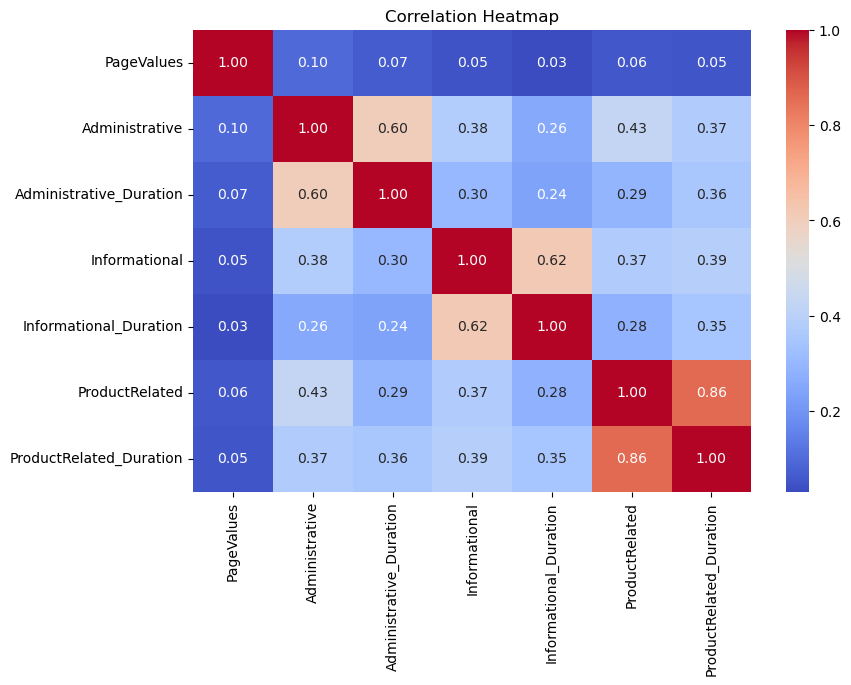

In [40]:
corr_df = df[['PageValues', 'Administrative', 'Administrative_Duration', 
              'Informational', 'Informational_Duration', 
              'ProductRelated', 'ProductRelated_Duration']]

# Calculating the correlation matrix
corr_matrix = corr_df.corr()

plt.figure(figsize=(9, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.savefig('corr_heatmap1.jpg', dpi=300, bbox_inches='tight')
plt.show()

### Analysis
> - Correlation with PageValues: All the features ('Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration') have a low correlation with 'PageValues'. The correlation coefficients are all below 0.1, which suggests that these features do not linearly predict 'PageValues' well.
> - Inter-feature Correlation: The duration features like 'Administrative_Duration', 'Informational_Duration', and 'ProductRelated_Duration' have moderate to high correlation with their respective count features ('Administrative', 'Informational', 'ProductRelated'). For example, 'Administrative' and 'Administrative_Duration' have a correlation of 0.60. This implies that the longer a visitor stays on an administrative page, the more likely they are to visit multiple administrative pages.

> Based on this, it seems reasonable to keep these features in the dataset for further analysis, as they are not redundant with 'PageValues'.

# Feature Engineering
> - Engagement Metrics: Average time spent on each page type (administrative, informational, and product-related) per visit.
> - Page Efficiency: A metric that combines BounceRates, ExitRates, and PageValues into a single measure. Since BounceRates and ExitRates are inversely related to page efficiency, and PageValues is directly related, we might consider a formula that inversely weights the rates compared to the page value.
> - Session Quality Score: A score that reflects the overall quality of the session based on engagement and page efficiency metrics. This metric gauges the session's value, combining engagement and page efficiency measures. Scores are calculated using a weighted sum, where each metric's weight reflects its significance.

In [41]:
# Engagement Metrics
df['Avg_Administrative_Duration'] = df['Administrative_Duration'] / (df['Administrative'] + 1)
df['Avg_Informational_Duration'] = df['Informational_Duration'] / (df['Informational'] + 1)
df['Avg_ProductRelated_Duration'] = df['ProductRelated_Duration'] / (df['ProductRelated'] + 1)

# Page Efficiency Metric
# Combining BounceRates and ExitRates (inverted impact) with PageValues
df['Page_Efficiency'] = (1 - df['BounceRates'] - df['ExitRates']) * df['PageValues']

# Session Quality Score
# A weighted sum of the engagement metrics and the page efficiency
weights = {
    'Avg_Administrative_Duration': 0.2,
    'Avg_Informational_Duration': 0.2,
    'Avg_ProductRelated_Duration': 0.2,
    'Page_Efficiency': 0.4  # Assigning a higher weight to Page Efficiency
}
df['SessionQuality_Score'] = (
    df['Avg_Administrative_Duration'] * weights['Avg_Administrative_Duration'] +
    df['Avg_Informational_Duration'] * weights['Avg_Informational_Duration'] +
    df['Avg_ProductRelated_Duration'] * weights['Avg_ProductRelated_Duration'] +
    df['Page_Efficiency'] * weights['Page_Efficiency']
)

# Output the new feature columns for verification
#df[['Avg_Administrative_Duration', 'Avg_Informational_Duration', 'Avg_ProductRelated_Duration', 'Page_Efficiency', 'Session_Quality_Score']].sample(5)
df.sample(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Region,TrafficType,VisitorType,Weekend,Revenue,Avg_Administrative_Duration,Avg_Informational_Duration,Avg_ProductRelated_Duration,Page_Efficiency,SessionQuality_Score
3759,4,766.833333,0,0.00,217,4153.276587,0.000071,0.005893,0.000000,0.0,...,1,6,Returning,1,No,153.366667,0.000000,19.051727,0.000000,34.483679
2455,0,0.000000,0,0.00,21,584.133333,0.000000,0.007143,0.000000,0.0,...,4,4,Returning,1,No,0.000000,0.000000,26.551515,0.000000,5.310303
3279,0,0.000000,0,0.00,6,156.000000,0.000000,0.016667,0.000000,0.2,...,5,1,Returning,0,No,0.000000,0.000000,22.285714,0.000000,4.457143
10743,0,0.000000,2,63.50,14,376.000000,0.037500,0.040625,0.000000,0.0,...,2,11,Returning,1,Yes,0.000000,21.166667,25.066667,0.000000,9.246667
12231,1,14.000000,0,0.00,11,239.583333,0.000000,0.016667,0.000000,0.0,...,6,1,Returning,1,No,7.000000,0.000000,19.965278,0.000000,5.393056
11931,4,55.000000,3,17.25,100,1284.361822,0.001923,0.011604,0.000000,0.0,...,1,10,Returning,0,No,11.000000,4.312500,12.716454,0.000000,5.605791
5194,9,505.500000,0,0.00,19,1227.000000,0.000000,0.017391,0.000000,0.0,...,1,4,Returning,0,No,50.550000,0.000000,61.350000,0.000000,22.380000
7397,8,164.466667,0,0.00,3,26.700000,0.022222,0.044444,0.000000,0.0,...,4,4,New,1,No,18.274074,0.000000,6.675000,0.000000,4.989815
4616,5,115.111111,2,146.00,89,3639.737302,0.000217,0.021383,5.159462,0.8,...,7,3,Returning,0,No,19.185185,48.666667,40.441526,5.048016,23.677882
10935,5,71.000000,0,0.00,57,1422.909324,0.005263,0.018892,13.550414,0.0,...,4,2,Returning,0,Yes,11.833333,0.000000,24.532919,13.223108,12.562494


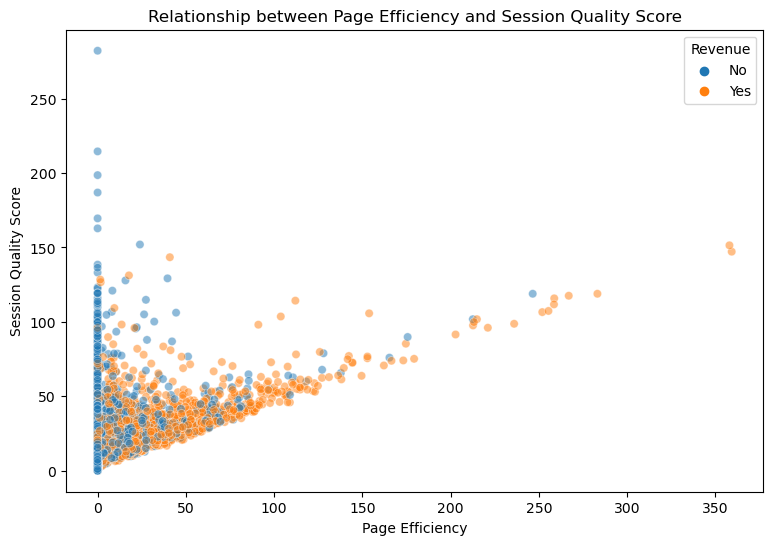

In [42]:
# Visualisation: Scatter Plot with Revenue for Page Efficiency

plt.figure(figsize=(9, 6))
sns.scatterplot(data=df, x='Page_Efficiency', y='SessionQuality_Score', hue=revenue_temp_map, alpha=0.5)
plt.title('Relationship between Page Efficiency and Session Quality Score')
plt.xlabel('Page Efficiency')
plt.ylabel('Session Quality Score')
plt.legend(title='Revenue')
plt.savefig('sessionquality_vs_pageefficiency.jpg', dpi=300, bbox_inches='tight')
plt.show()

### Page Efficiency vs Session Quality Score by Revenue Analysis
> - A cluster of revenue-positive sessions can be seen where both Page Efficiency and Session Quality Score are high, reinforcing that an efficient and engaging user experience on the website is linked to sales potential.

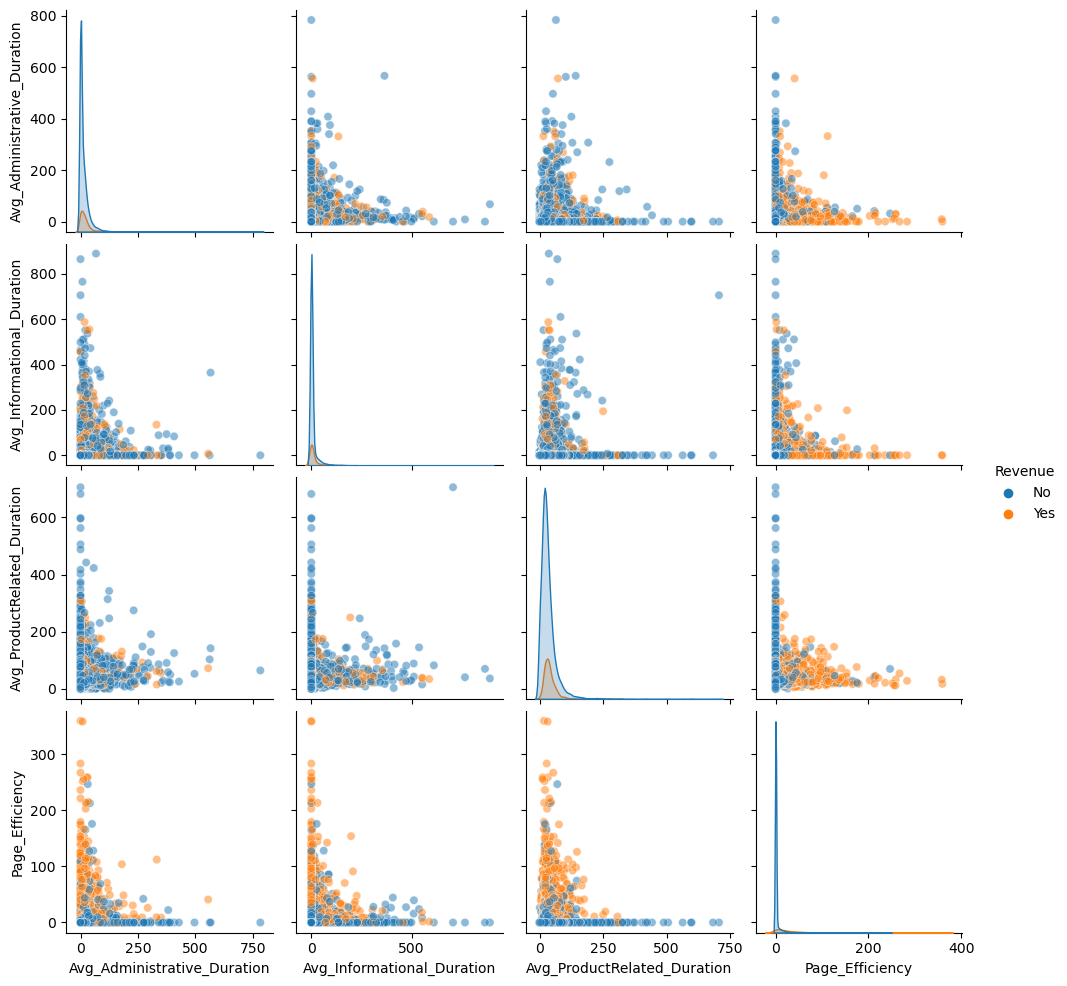

In [49]:
#df_temp = df.copy()
#df_temp['Revenue'] = df_temp['Revenue'].map({0: 'No', 1: 'Yes'})

# Visualisation: Pair Plot of selected features
sns.pairplot(df[['Avg_Administrative_Duration', 'Avg_Informational_Duration',
                      'Avg_ProductRelated_Duration', 'Page_Efficiency', 'Revenue']],
             hue='Revenue', diag_kind='kde', plot_kws={'alpha':0.5})

#plt.legend()
plt.savefig('pairplot.jpg', dpi=300, bbox_inches='tight')
plt.show()

#### Checking for redundancy in features to reduce multicollinearity risks

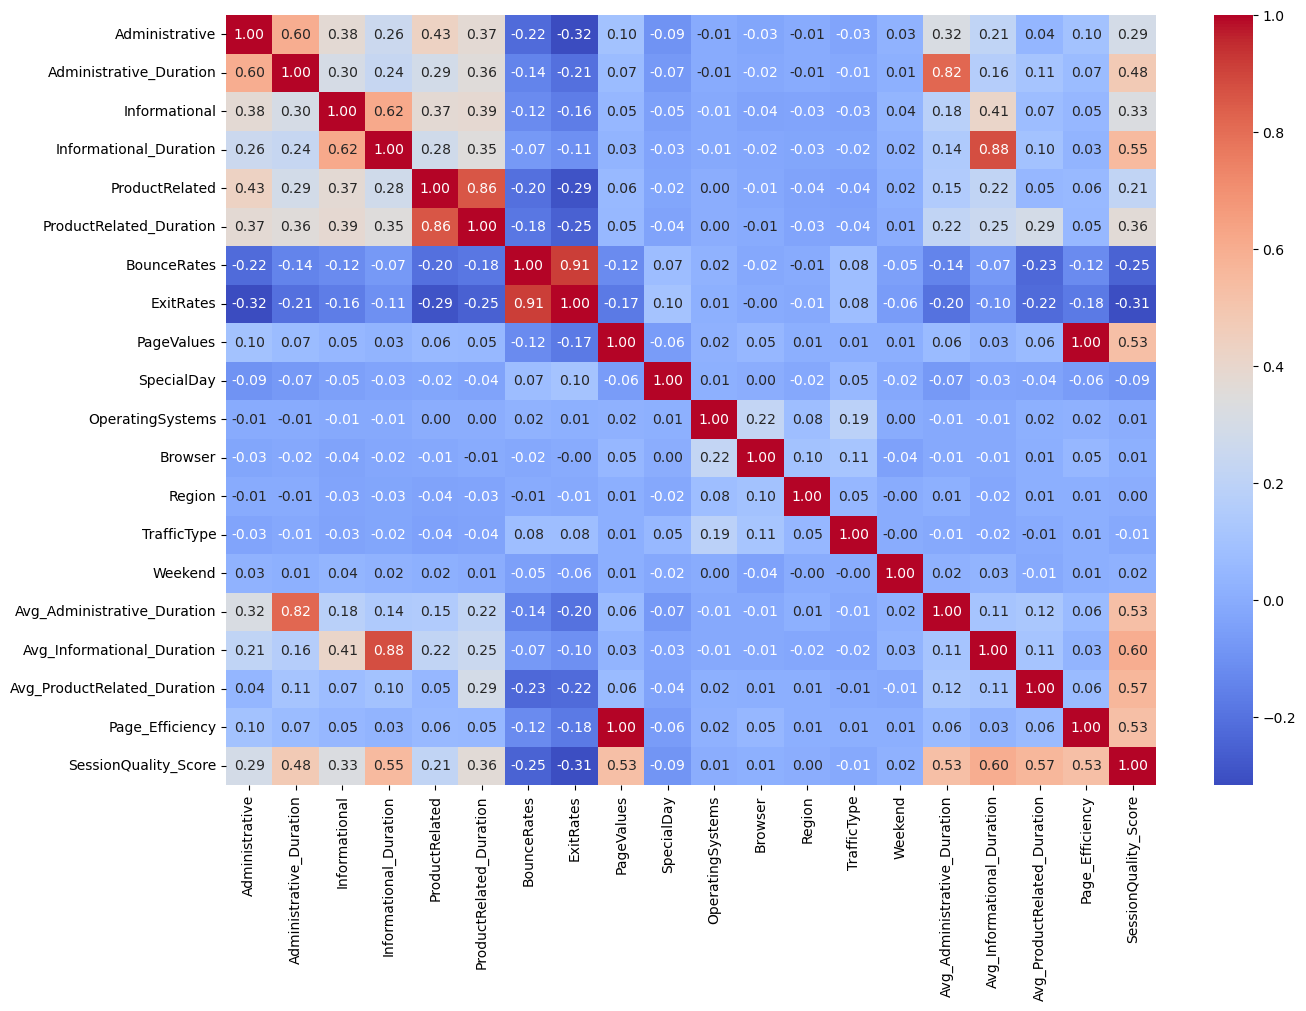

In [50]:
# Calculating the correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
#plt.title('Correlation Heatmap')
plt.savefig('corr_heatmap2.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [53]:
# Columns to be excluded
exclude_columns = ['Avg_Administrative_Duration', 'Avg_Informational_Duration', 'Avg_ProductRelated_Duration']

corr_matrix = df.drop(columns=exclude_columns).corr()

#plt.figure(figsize=(15, 10))
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
#plt.savefig('corr_heatmap3.jpg', dpi=400, bbox_inches='tight')
#plt.show()

In [54]:
corr_matrix = df.corr()

# Looking into the features that have a high correlation with each other
# Setting a threshold for high correlation
high_corr_threshold = 0.9

# Finding pairs of features that have a correlation higher than the threshold (excluding self-correlation of 1)
highly_correlated_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)
highly_correlated_pairs = highly_correlated_pairs[highly_correlated_pairs >= high_corr_threshold]
highly_correlated_pairs = highly_correlated_pairs[highly_correlated_pairs < 1]

# Removing duplicates because the matrix is symmetric
highly_correlated_pairs = highly_correlated_pairs[::2]

highly_correlated_pairs

Page_Efficiency  PageValues     0.999851
ExitRates        BounceRates    0.913004
dtype: float64

### Correlation Analysis
> - Opting to retain 'PageValues' over 'Page_Efficiency' due to their near-identical correlation, indicating redundancy. 'PageValues' is an established metric closely link to revenue, making it a good predictor for our model. In contrast, 'Page_Efficiency' appears to be a derivative metric without additional predictive benefit and it is not a standard metric used in e-commerce analytics.
> - Although 'BounceRates' and 'ExitRates' are also highly correlated, they measure unique user behaviors and are both relevant for a nuanced understanding of user engagement. Therefore, they are kept in the feature set.
> By removing 'Page_Efficiency', we reduce multicollinearity risks, ensuring our model is more reliable and our interpretations are clear.

# Prepare Data for Modelling

### Label Encoding
> - Convert 'Month' and 'VisitorType' to numerical for data preparation

In [55]:
df_modified = df.copy()

# Dropping the 'Page_Efficiency' column
df_modified.drop('Page_Efficiency', axis=1, inplace=True)

# Encoding 'VisitorType' with LabelEncoder
visitor_type_encoder = LabelEncoder()
df_modified['VisitorType'] = visitor_type_encoder.fit_transform(df_modified['VisitorType'])

# Encoding 'Month' with custom mapping to preserve the order
months_mapping = {'Feb': 2, 'Mar': 3, 'May': 5, 'June': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
df_modified['Month'] = df_modified['Month'].map(months_mapping)

# Save the modified DF to a new CSV file
df_modified.to_csv('online_shoppers_intention_modified.csv', index=False)

df_modified.sample(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Avg_Administrative_Duration,Avg_Informational_Duration,Avg_ProductRelated_Duration,SessionQuality_Score
2099,3,154.500000,0,0.0,21,638.333333,0.000000,0.047222,0.000000,0.0,...,5,4,4,2,0,No,38.625000,0.0,29.015152,13.528030
0,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,1,1,1,2,0,No,0.000000,0.0,0.000000,0.000000
9627,0,0.000000,0,0.0,64,4492.311111,0.004762,0.022706,0.000000,0.0,...,2,3,2,2,0,Yes,0.000000,0.0,69.112479,13.822496
7518,3,154.000000,0,0.0,8,422.080000,0.000000,0.035185,27.934783,0.0,...,1,4,4,2,0,Yes,38.500000,0.0,46.897778,27.860312
739,2,48.666667,0,0.0,48,3726.333333,0.000000,0.004167,0.000000,0.0,...,2,1,9,2,1,No,16.222222,0.0,76.047619,18.453968
8577,3,36.000000,0,0.0,3,29.500000,0.000000,0.040000,0.000000,0.0,...,10,3,2,1,0,No,9.000000,0.0,7.375000,3.275000
9808,3,284.000000,0,0.0,33,2270.750000,0.000000,0.010840,0.000000,0.0,...,2,7,2,2,0,No,71.000000,0.0,66.786765,27.557353
6338,0,0.000000,0,0.0,80,1566.333333,0.005000,0.027917,0.720181,0.0,...,2,6,1,2,0,Yes,0.000000,0.0,19.337449,4.146080
2843,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,2,7,1,2,0,No,0.000000,0.0,0.000000,0.000000
8683,7,190.437500,0,0.0,60,1967.780163,0.003810,0.015465,2.627347,0.0,...,2,8,10,2,1,Yes,23.804688,0.0,32.258691,12.243358
